## Author: Ranjan Mukesh Borkar

# Task 2
## K-Means Clustering using Scikit Learn
**We are given the iris dataset and asked to find the optimal number of clusters and hence cluster the data and make a visualization of it.**

### Importing libraries, Reading the dataset.
In this section we will:
1.  Import libraries which we will use to perform the analysis.
2.  Read the data set into a dataframe object to allow for better handling of data.
3.  Visualize our dataset

In [1]:
#Importing the required libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the iris dataset in the dataframe dataset
dataset = pd.read_csv("Iris.csv")
print(f'The size of dataset is: {dataset.shape[0]} rows * {dataset.shape[1]} columns')
#Let us see the first ten entries in our dataframe dataset
display(dataset.head(10))

The size of dataset is: 150 rows * 6 columns


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Now, We see that there are columns which we don't need like Id and the labels Species. Species already classifies our dataset into 3 categories so including it for making clusters does not make sense.

We make a copy of our dataset so as to not affect our original dataset and work with ease.

In [3]:
X = dataset.copy()
X.drop(["Id","Species"], axis = 1, inplace = True)

In [4]:
#Our model requires an array input so converting the dataframe to array
X =  np.array(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

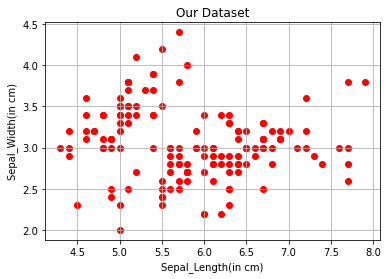

In [5]:
#Visualizing the dataset based on the first two entries
plt.scatter(X[:, 0], X[:, 1], color = "red")
plt.xlabel("Sepal_Length(in cm)")
plt.ylabel("Sepal_Width(in cm)")
plt.title("Our Dataset")
plt.grid()
plt.show()

### Finding the Optimum number of clusters using WCSS

WCSS or Within-cluster-sum-of-squares is a simply the sum of squares of the distances of each data point in all clusters to their respective centroids. It decreases as we increase the number of clusters and to find the optimal cluster we can use the Elbow Method.

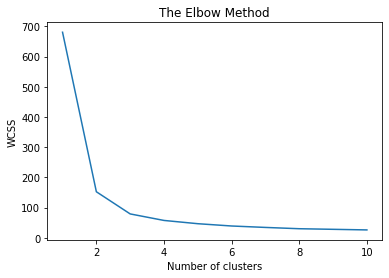

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**So number of clusters to choose can be taken as 3.**

### Training the Model

Now that we know the optimal number of clusters it's time to train our model.Note that our model will define its clusters on it's own and return a integer for it. We can use y_kmeans and our dataset to compare which labels were given by our model.

In [7]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 0)               
y_kmeans = model.fit_predict(X)

In [8]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

One can see that our model has labelled the first few rows as cluster 1. We can safely say that 1 corresponds to Iris-setosa, 2 corresponds to Iris-versicolor and 0 corresponds to Iris-virginica. So, we plot according to it.

### Visualizing the clusters formed.

We plot the first two columns to visualize the clusters in a 2-D space.

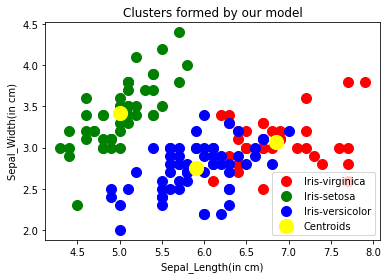

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters formed by our model')
plt.xlabel('Sepal_Length(in cm)')
plt.ylabel('Sepal_Width(in cm)')
plt.legend()
plt.show()

So, we can see different clusters in the above graph. The centroids for each cluster is given in yellow. Hence, we complete our task for clustering and visualising.

## This concludes our analysis for this task.
### Important Links: 
[GitHub](https://github.com/xxrocripxx/TheSparksFoundation)
[YouTube](https://www.youtube.com/channel/UCoFutkgRXGpHbZm8VnJp69Q)
[LinkedIn](https://www.linkedin.com/in/ranjan-borkar-88782215b/)